CSE4022 - Natural Language Processing<br>
J Component

---
# **Toxic Comment Classification**
---


Yashvardhan Gupta - 20BCE1289<br>
Shrikar Jayaraman - 20BCE1478



## Importing all Modules

In [ ]:
import pandas as pd #For Dataset Visualization
import re #For Cleaning the Dataset
from nltk.stem.porter import PorterStemmer #For Porter Stemming
import nltk #Natural Language Processing Toolkit
nltk.download('stopwords') #For Stopwords
from sklearn import * #For Dataset Training

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading the Dataset

In [ ]:
df=pd.read_csv("training-models/amazon.csv") #Reading Amazon Dataset
df.head() #Displaying the Dataset

,id,label,texts
0,1,1,"Good case, Excellent value."
1,2,1,Great for the jawbone.
2,3,0,Tied to charger for conversations lasting more...
3,4,1,The mic is great.
4,5,0,I have to jiggle the plug to get it to line up...


In [ ]:
df['label'].value_counts() #Number of values in the dataset

1    500
0    499
Name: label, dtype: int64

## Operating on the Dataset
**1. Cleaning the Text**

In [ ]:
#Removing Puncations, Capital Letters, etc.
def cleaner(text): 
    text=re.sub('<[^>]*>','',text)
    emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text=re.sub('[\W]+',' ',text.lower()) +' '.join(emojis).replace('-','')

    return text   

#Applying and Displaying
df['cleared_texts']=df['texts'].apply(cleaner)
df.head()

,id,label,texts,cleared_texts
0,1,1,"Good case, Excellent value.",good case excellent value
1,2,1,Great for the jawbone.,great for the jawbone
2,3,0,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...
3,4,1,The mic is great.,the mic is great
4,5,0,I have to jiggle the plug to get it to line up...,i have to jiggle the plug to get it to line up...


**2. Tokenization**

In [ ]:
#Word Tokenization
def tokenizer(texts):
    return texts.split()

#Applying and Displaying
df['tokenized_texts']=df['cleared_texts'].apply(tokenizer)
df.head()

,id,label,texts,cleared_texts,tokenized_texts
0,1,1,"Good case, Excellent value.",good case excellent value,"[good, case, excellent, value]"
1,2,1,Great for the jawbone.,great for the jawbone,"[great, for, the, jawbone]"
2,3,0,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin..."
3,4,1,The mic is great.,the mic is great,"[the, mic, is, great]"
4,5,0,I have to jiggle the plug to get it to line up...,i have to jiggle the plug to get it to line up...,"[i, have, to, jiggle, the, plug, to, get, it, ..."


**3. Removing the Stopwords**

In [ ]:
#Loading English Stopwords from the Package
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
 
#Removing Stopwords form the Tokenized Texts
def stopworder(token_texts):
    filtered_list=[]
    for word in token_texts:
            if word.casefold() not in stop_words:
                filtered_list.append(word)
    return filtered_list

#Applying and Displaying
df['stopwords_removed']=df['tokenized_texts'].apply(stopworder)
df.head()

,id,label,texts,cleared_texts,tokenized_texts,stopwords_removed
0,1,1,"Good case, Excellent value.",good case excellent value,"[good, case, excellent, value]","[good, case, excellent, value]"
1,2,1,Great for the jawbone.,great for the jawbone,"[great, for, the, jawbone]","[great, jawbone]"
2,3,0,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin...","[tied, charger, conversations, lasting, 45, mi..."
3,4,1,The mic is great.,the mic is great,"[the, mic, is, great]","[mic, great]"
4,5,0,I have to jiggle the plug to get it to line up...,i have to jiggle the plug to get it to line up...,"[i, have, to, jiggle, the, plug, to, get, it, ...","[jiggle, plug, get, line, right, get, decent, ..."


**4. Porter Stemming**

In [ ]:
#Loading Porter Stemmer from NLTK
stemmer = PorterStemmer()

#Porter Stemmer
def porter_stemmer(texts):
    stemmed_words = [stemmer.stem(word) for word in texts]
    joined_str=""
    for word in stemmed_words:
        joined_str=joined_str+" "+word
    return joined_str
  
#Applying and Displaying
df['stemmed_texts']=df['stopwords_removed'].apply(porter_stemmer)
df.head()

,id,label,texts,cleared_texts,tokenized_texts,stopwords_removed,stemmed_texts
0,1,1,"Good case, Excellent value.",good case excellent value,"[good, case, excellent, value]","[good, case, excellent, value]",good case excel valu
1,2,1,Great for the jawbone.,great for the jawbone,"[great, for, the, jawbone]","[great, jawbone]",great jawbon
2,3,0,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin...","[tied, charger, conversations, lasting, 45, mi...",tie charger convers last 45 minut major problem
3,4,1,The mic is great.,the mic is great,"[the, mic, is, great]","[mic, great]",mic great
4,5,0,I have to jiggle the plug to get it to line up...,i have to jiggle the plug to get it to line up...,"[i, have, to, jiggle, the, plug, to, get, it, ...","[jiggle, plug, get, line, right, get, decent, ...",jiggl plug get line right get decent volum


## Classification of Stemmed Sentences
*   Amazon

In [ ]:
#Make a Dict of all of words
def dictionary_texts(cleaned_tokens_list):
    for text_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in text_tokens)

In [ ]:
#Creating a Tokenized list of the stemmed words
text_list = list(df['stemmed_texts'].apply(tokenizer))
print(type(text_list))
tokens_for_model = dictionary_texts(text_list)

#Creating a List of Positive and Negative Texts
positive_list=list(df['stemmed_texts'][df['label']==1].apply(tokenizer))
negative_list=list(df['stemmed_texts'][df['label']==0].apply(tokenizer))

#Creating token list of Positive and Negative Texts
positive_tokens = dictionary_texts(positive_list)
negative_tokens = dictionary_texts(negative_list)

<class 'list'>


In [ ]:
#Making a new Dataset
positive_dataset = [(text_dict, "Positive") for text_dict in positive_tokens]
negative_dataset = [(text_dict, "Negative") for text_dict in negative_tokens]

dataset = positive_dataset + negative_dataset

In [ ]:
#For Random Training
import random
random.shuffle(dataset)

**Calculaing the Accuracy of Amazon**

In [ ]:
#Dividing Positive and Negative Training 
train_data = dataset[:799]
test_data = dataset[800:]

print(train_data)

#Calculating the Accuracy
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

[({'gosh': True, 'best': True, 'phone': True, 'ever': True}, 'Positive'), ({'logitech': True, 'bluetooth': True, 'headset': True, '10': True}, 'Positive'), ({'place': True, 'treo': True, 'case': True, 'snug': True, 'lot': True, 'extra': True, 'room': True, 'side': True}, 'Negative'), ({'fit': True, 'secur': True, 'ear': True, 'hook': True, 'even': True, 'need': True, 'use': True, 'sound': True, 'better': True, 'direct': True, 'canal': True}, 'Positive'), ({'realli': True, 'easi': True}, 'Positive'), ({'good': True, 'product': True, 'well': True, 'made': True}, 'Positive'), ({'great': True, 'choic': True}, 'Positive'), ({'drivng': True, 'along': True, 'headset': True, 'start': True, 'ring': True, 'reason': True}, 'Negative'), ({'phone': True, 'work': True, 'fine': True}, 'Positive'), ({'end': True, 'slide': True, 'edg': True, 'pant': True, 'back': True, 'pocket': True, 'instead': True}, 'Positive'), ({'due': True, 'happen': True, 'everi': True, 'call': True, 'forc': True, 'stop': True, 

In [ ]:
#Custom Text Classification

custom = "Happy girls are the prettiest and sweetest"
custom=cleaner(custom)
custom=tokenizer(custom)
custom=stopworder(custom)
custom=porter_stemmer(custom)
custom=tokenizer(custom)
print(classifier.classify(dict([token, True] for token in custom)))

Accuracy is: 0.8291457286432161
Positive


In [ ]:
#Saving the Trained Model

import pickle
data={"classifier":classifier}
with open ('saved_model_new.pk1','wb') as file:
    pickle.dump(data,file)

In [ ]:
#Loading the Trained Model
with open('saved_model_new.pk1','rb') as file:
    data=pickle.load(file)

#Custom Text Classification
model_loaded=data['classifier']
custom="This is so ugly. It is so bad remove it please"
custom=cleaner(custom)
custom=tokenizer(custom)
custom=stopworder(custom)
custom=porter_stemmer(custom)
custom=tokenizer(custom)
print(model_loaded.classify(dict([token, True] for token in custom)))

Negative


## Classification of Stemmed Sentences
*   Amazon
*   Yelp
*   IMDB

**Adding Yelp Dataset**

In [ ]:
#Loading Yelp and Amazon Dataset
yelp=pd.read_csv("training-models/yelp.csv")
amazon=pd.read_csv("training-models/amazon.csv")

#Displaying Yelp Dataset
yelp.head()

,id,label,texts
0,1,0,Crust is not good.
1,2,0,Not tasty and the texture was just nasty.
2,3,1,Stopped by during the late May bank holiday of...
3,4,1,The selection on the menu was great and so wer...
4,5,0,Now I am getting angry and I want my damn pho.


In [ ]:
#Appending Yelp Dataset to Amazon
new_dataset=amazon.append(yelp)

<ipython-input-32-b6f18bf1b22b>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataset=amazon.append(yelp)


**Adding IMDB Dataset**

In [ ]:
#Loading IMDB Dataset
imdb=pd.read_csv("training-models/imdb.csv")
imdb.head()
def convert_int(text):
    return int(text)

imdb['label']=imdb['label'].apply(convert_int)

In [ ]:
#Appending IMDB Dataset to {Amazon, Yelp}
new_dataset=new_dataset.append(imdb)

<ipython-input-34-3ac23cee0aac>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataset=new_dataset.append(imdb)


**Training the new Dataset (Amazon, Yelp and IMDB)**

In [ ]:
#Adding new Data Values to the created Dataset
new_dataset['label'].value_counts()

#Negative Data
new_dataset.loc[len(new_dataset.index)] = [1000, 0, 'shut up you dumb idiot'] 
new_dataset.loc[len(new_dataset.index)] = [1001, 0, 'fuck you dumb fucking idiot']
new_dataset.loc[len(new_dataset.index)] = [1002, 0, 'ew get lost and dont come here ever again']

#Positive Data
text='this is the sweetest'
label_new=1

#Positive Data
new_dataset.loc[len(new_dataset.index)] = [(new_dataset.tail(1).id.values[0]+1), label_new, text]
text='absolutely perfect'
label_new=1

#Positive Data
new_dataset.loc[len(new_dataset.index)] = [(new_dataset.tail(1).id.values[0]+1), label_new, text]
text='lovely like angel'
label_new=1

#Positive Data
new_dataset.loc[len(new_dataset.index)] = [(new_dataset.tail(1).id.values[0]+1), label_new, text]
text='your eyes so pretty'
label_new=1
new_dataset.loc[len(new_dataset.index)] = [(new_dataset.tail(1).id.values[0]+1), label_new, text]

In [ ]:
#Displaying the new Dataset
new_dataset.tail()

,id,label,texts
2999,1002,0,ew get lost and dont come here ever again
3000,1003,1,this is the sweetest
3001,1004,1,absolutely perfect
3002,1005,1,lovely like angel
3003,1006,1,your eyes so pretty


In [ ]:
#Operating on the new data

new_dataset['cleared_texts']=new_dataset['texts'].apply(cleaner)
new_dataset['tokenized_texts']=new_dataset['cleared_texts'].apply(tokenizer)
new_dataset['stopwords_removed']=new_dataset['tokenized_texts'].apply(stopworder)
new_dataset['stemmed_texts']=new_dataset['stopwords_removed'].apply(porter_stemmer)

In [ ]:
#Positive and Negative Data Lists

text_list = list(df['stemmed_texts'].apply(tokenizer))
print(type(text_list))
tokens_for_model = dictionary_texts(text_list)

positive_list=list(new_dataset['stemmed_texts'][new_dataset['label']==1].apply(tokenizer))
negative_list=list(new_dataset['stemmed_texts'][new_dataset['label']==0].apply(tokenizer))

positive_tokens = dictionary_texts(positive_list)
negative_tokens = dictionary_texts(negative_list)

<class 'list'>


In [ ]:
#Positive and Negative Data Tokens

positive_dataset = [(text_dict, "Positive") for text_dict in positive_tokens]
negative_dataset = [(text_dict, "Negative") for text_dict in negative_tokens]

dataset = positive_dataset + negative_dataset

**Calculating Accuracy**

In [ ]:
#Positive and Negative Data Classification

from nltk import classify
from nltk import NaiveBayesClassifier
new_classifier = NaiveBayesClassifier.train(dataset)

print("Accuracy is:", classify.accuracy(new_classifier, dataset))

Accuracy is: 0.9310918774966711


**Saving the Model**

In [ ]:
#Saving the New Model

import pickle
data={"classifier":new_classifier}
with open ('saved_model.pk1','wb') as file:
    pickle.dump(data,file)

## Custom Sentence Classification

**Testing New Model with custom sentences**

In [ ]:
#Loading the New Dataset
with open('saved_model.pk1','rb') as file:
    data=pickle.load(file)
model_loaded=data['classifier']

#Custom Text Classification
custom="absolutely amazing, loved it!"
custom=cleaner(custom)
custom=tokenizer(custom)
custom=stopworder(custom)
custom=porter_stemmer(custom)
custom=tokenizer(custom)
print(model_loaded.classify(dict([token, True] for token in custom)))

Positive


In [ ]:
#Custom Text Classification
custom="What is this trash!!!!"
custom=cleaner(custom)
custom=tokenizer(custom)
custom=stopworder(custom)
custom=porter_stemmer(custom)
custom=tokenizer(custom)
print(model_loaded.classify(dict([token, True] for token in custom)))

Negative


#Realtime Twitter

Downloading all the modules

In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-uly1vchl
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-uly1vchl
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 3dd9c28e31b8babeb2a187fbae994d9717ded168
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


Fetching Tweets

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Created a list to append all tweet attributes(data)
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('').get_items()):
    if i>100:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe from the tweets list above 
tweets_df = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])
tweets_df.head(30)

<ipython-input-57-34e926ed6751>:11: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])


,Date Created,Number of Likes,Source of Tweet,Tweets
0,2023-04-04 13:08:33+00:00,0,Twitter for Android,Gigi Hadid reacts to Varun Dhawan picking her ...
1,2023-04-04 10:55:00+00:00,1,Twitter Web App,Gigi Hadid reacts to Varun Dhawan picking her ...
2,2023-04-04 09:55:00+00:00,4,TweetDeck,Mukesh Ambani Had Tears In His Eyes Over Varun...
3,2023-04-04 09:20:04+00:00,0,Twitter Web App,"Artis Bollywood, Varun Dhawan dituding mencuri..."
4,2023-04-04 06:22:11+00:00,11,Echobox,Shah Rukh Khan turut hadir di acara gala NMACC...
5,2023-04-04 06:09:37+00:00,1,Echobox,Shah Rukh Khan turut hadir di acara gala NMACC...
6,2023-04-03 20:42:57+00:00,0,Twitter Web App,Full Video: Varun Dhawan gets Dragged for kiss...
7,2023-04-03 14:13:14+00:00,2,Twitter Web App,Varun Dhawan receives criticism for lifting Gi...
8,2023-04-03 12:43:02+00:00,4,Bollywoodlife,Gigi Hadid addresses Varun Dhawan's kiss that ...
9,2023-04-03 12:24:00+00:00,2,Twitter Web App,"SRK, Ranveer Singh, Varun Dhawan, Alia Bhatt a..."


Clasifying the live tweets with trained model

In [ ]:
with open('saved_model.pk1','rb') as file:
    data=pickle.load(file)
model_loaded=data['classifier']

tweets_extracted = []
verdict = []

for i in tweets_df.Tweets:
  tweets_extracted.append(i)

print(tweets_extracted)

for i in tweets_extracted:
  custom = i
  custom=cleaner(custom)
  custom=tokenizer(custom)
  custom=stopworder(custom)
  custom=porter_stemmer(custom)
  custom=tokenizer(custom)
  verdict.append(model_loaded.classify(dict([token, True] for token in custom)))

print(verdict)

['Gigi Hadid reacts to Varun Dhawan picking her up and kissing her at NMACC Gala https://t.co/sn1h92vevM', 'Gigi Hadid reacts to Varun Dhawan picking her up and kissing her at NMACC Gala\n\n#GigiHadid #VarunDhawan #Bollywood https://t.co/15TGgt3vZu', 'Mukesh Ambani Had Tears In His Eyes Over Varun Dhawan, Gigi Hadid Performance At NMACC Gala, Reveals Shiamak Davar.\n\nhttps://t.co/yiHLriwfL3', 'Artis Bollywood, Varun Dhawan dituding mencuri kesempatan saat mengajak supermodel Gigi Hadid naik ke atas panggung. Hal itu terjadi dalam sebuah pesta di Nita Mukesh Ambani Cultural Centre (NMACC) Gala, yang digelar di Mumbai, India. \n\nhttps://t.co/V5p30vgHQP', 'Shah Rukh Khan turut hadir di acara gala NMACC yang digelar di India pada Sabtu (1/4). Ia bahkan sempat menari Jhoome Jo Pathaan bersama dua aktor muda, Varun Dhawan dan Ranveer Singh. https://t.co/N17XYx9Iei', 'Shah Rukh Khan turut hadir di acara gala NMACC yang digelar di India pada Sabtu (1/4). Ia bahkan sempat menari Jhoome Jo Pat

Adding to Dataset and displaying

In [ ]:
tweets_df['Classification'] = verdict
tweets_df.head(30)

,Date Created,Number of Likes,Source of Tweet,Tweets,Classification
0,2023-04-04 13:08:33+00:00,0,Twitter for Android,Gigi Hadid reacts to Varun Dhawan picking her ...,Negative
1,2023-04-04 10:55:00+00:00,1,Twitter Web App,Gigi Hadid reacts to Varun Dhawan picking her ...,Negative
2,2023-04-04 09:55:00+00:00,4,TweetDeck,Mukesh Ambani Had Tears In His Eyes Over Varun...,Positive
3,2023-04-04 09:20:04+00:00,0,Twitter Web App,"Artis Bollywood, Varun Dhawan dituding mencuri...",Negative
4,2023-04-04 06:22:11+00:00,11,Echobox,Shah Rukh Khan turut hadir di acara gala NMACC...,Negative
5,2023-04-04 06:09:37+00:00,1,Echobox,Shah Rukh Khan turut hadir di acara gala NMACC...,Negative
6,2023-04-03 20:42:57+00:00,0,Twitter Web App,Full Video: Varun Dhawan gets Dragged for kiss...,Negative
7,2023-04-03 14:13:14+00:00,2,Twitter Web App,Varun Dhawan receives criticism for lifting Gi...,Positive
8,2023-04-03 12:43:02+00:00,4,Bollywoodlife,Gigi Hadid addresses Varun Dhawan's kiss that ...,Positive
9,2023-04-03 12:24:00+00:00,2,Twitter Web App,"SRK, Ranveer Singh, Varun Dhawan, Alia Bhatt a...",Negative


#Toxicity of a Comment
In the previous section, we did identify to some accuracy if a particular comment is negative or positive, but a negative comment doesn't necessarily mean that it is a toxic comment.

For our final review, we are now going to be diving a dataset into levels of toxicity and training them with a BLSTM model henceforth making the classification accurate and also on a scale.

In [ ]:
#importing modules

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import log_loss

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack

import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')

from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("dark")

from subprocess import check_output

train = pd.read_csv('bert/train.csv', error_bad_lines=False).fillna(' ')
test = pd.read_csv('bert/test.csv', error_bad_lines=False).fillna(' ')
subm = pd.read_csv('bert/sample_submission.csv')

train.head()
train.shape


<ipython-input-61-c876efc897c0>:30: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train = pd.read_csv('bert/train.csv', error_bad_lines=False).fillna(' ')
<ipython-input-61-c876efc897c0>:31: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test = pd.read_csv('bert/test.csv', error_bad_lines=False).fillna(' ')


(159571, 8)

In [ ]:
#Number of toxic comments
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2),
                             max_df=0.5,
                             min_df=4,
                             max_features=1000)
vector_space_model = vectorizer.fit_transform(train['comment_text'].values.astype('U').tolist()) # converting the dtype object to unicode string 
n_comments = vector_space_model.shape[0]
print('%d Total Comments' % n_comments)

159571 Total Comments


In [ ]:
#Estimation of Parameters
training_set_size = int(n_comments * 0.33)
X = vector_space_model[:training_set_size,:]
Z = vector_space_model[training_set_size:vector_space_model.shape[0]-1,:]
print('%d comments for the estimation of the parameters and %d for the evaluation' % 
      (X.shape[0], Z.shape[0]))

52658 comments for the estimation of the parameters and 106912 for the evaluation


In [ ]:
from sklearn import linear_model

X = X.toarray()
Y = train['toxic'][:training_set_size]
model = linear_model.BayesianRidge(verbose=True)
model.fit(X, Y)

Convergence after  4  iterations


BayesianRidge(verbose=True)

In [ ]:
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix

ground_truth = train['toxic'][training_set_size:vector_space_model.shape[0]-1]
prediction = model.predict(Z)
prediction = binarize(prediction.reshape(-1, 1), threshold = 0.5)

In [ ]:
#Toxic Comments ID's
toxic_ids = [i for i, c in enumerate(prediction) if c == 1]
toxic_ids

[18,
 26,
 31,
 44,
 46,
 69,
 134,
 141,
 147,
 149,
 161,
 168,
 223,
 248,
 268,
 288,
 300,
 383,
 384,
 399,
 403,
 489,
 492,
 524,
 544,
 565,
 566,
 592,
 633,
 658,
 713,
 750,
 783,
 787,
 809,
 814,
 828,
 843,
 851,
 861,
 872,
 908,
 933,
 944,
 975,
 1000,
 1007,
 1028,
 1065,
 1108,
 1249,
 1252,
 1310,
 1313,
 1327,
 1393,
 1438,
 1464,
 1480,
 1489,
 1492,
 1510,
 1605,
 1616,
 1726,
 1737,
 1747,
 1780,
 1822,
 1829,
 1841,
 1845,
 1919,
 1976,
 1977,
 1990,
 2012,
 2022,
 2034,
 2133,
 2168,
 2201,
 2208,
 2216,
 2217,
 2226,
 2245,
 2267,
 2313,
 2403,
 2440,
 2459,
 2467,
 2493,
 2502,
 2519,
 2526,
 2533,
 2574,
 2606,
 2650,
 2662,
 2688,
 2694,
 2707,
 2713,
 2755,
 2787,
 2821,
 2905,
 2989,
 3051,
 3066,
 3073,
 3098,
 3110,
 3174,
 3191,
 3228,
 3252,
 3267,
 3278,
 3292,
 3293,
 3336,
 3345,
 3373,
 3379,
 3405,
 3452,
 3456,
 3545,
 3601,
 3631,
 3652,
 3660,
 3676,
 3699,
 3707,
 3770,
 3771,
 3802,
 3861,
 3862,
 3870,
 3889,
 3898,
 3928,
 3937,
 3958,
 

In [ ]:
#Checking if ID's are toxic
comment_id = toxic_ids[12]
print('Content of the comment: \n%s\n' % train['comment_text'][training_set_size+comment_id])
print('Is this comment "toxic" according to the model?\n%s' % str(model.predict(Z[comment_id,:]) >0.5))

Content of the comment: 
Fuck. 

Oh, yeah.

You like it, don't you? DON'T DENY IT! I can see your cock gettin' long. I wanna suck it like a sucker 'til all the candy comes out.  —Preceding unsigned comment added by  (talk • contribs)

Is this comment "toxic" according to the model?
[ True]


In [ ]:
#Clean Comments
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
train['clean'].sum()

143346

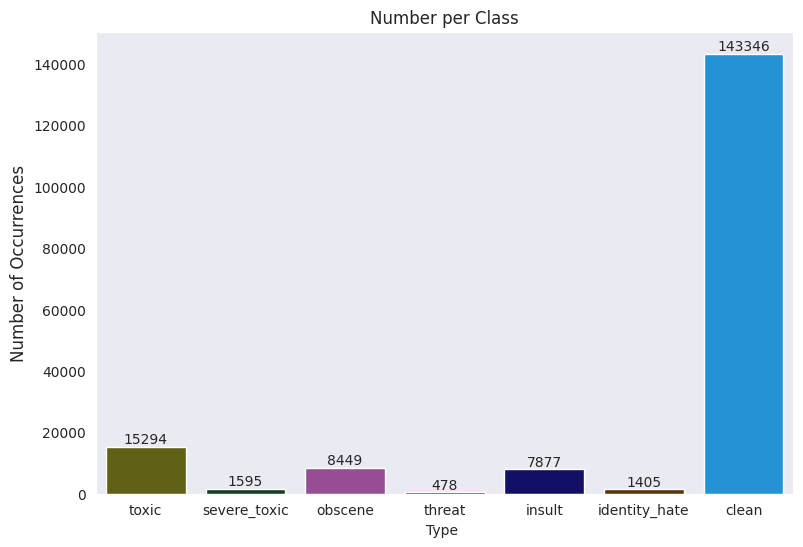

In [ ]:
#Number of Toxic Comments
colors_list = ["brownish green", "pine green", "ugly purple",
               "blood", "deep blue", "brown", "azure"]

palette= sns.xkcd_palette(colors_list)

x=train.iloc[:,2:].sum()

plt.figure(figsize=(9,6))
ax= sns.barplot(x= x.index, y = x.values, palette=palette)
plt.title("Number per Class")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type ')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()

In [ ]:
import nltk
nltk.download('punkt')

comment_text_list = train.apply(lambda row : nltk.word_tokenize( row['comment_text']),axis=1)
comment_text_list.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [Explanation, Why, the, edits, made, under, my...
1    [D'aww, !, He, matches, this, background, colo...
2    [Hey, man, ,, I, 'm, really, not, trying, to, ...
3    [``, More, I, ca, n't, make, any, real, sugges...
4    [You, ,, sir, ,, are, my, hero, ., Any, chance...
dtype: object

In [ ]:
#An odd comment contains a high rate of punctuation symbols or capital letters
rate_punctuation=0.7
rate_capital=0.7
def odd_comment(comment):
    punctuation_count=0
    capital_letter_count=0
    total_letter_count=0
    for token in comment:
        if token in list(string.punctuation):
            punctuation_count+=1
        capital_letter_count+=sum(1 for c in token if c.isupper())
        total_letter_count+=len(token)
    return((punctuation_count/len(comment))>=rate_punctuation or 
           (capital_letter_count/total_letter_count)>rate_capital)

odd=comment_text_list.apply(odd_comment)

In [ ]:
odd_ones=odd[odd==True]
odd_comments=train.loc[list(odd_ones.index)]
odd_comments[odd_comments.clean==False].count()/len(odd_comments)

id               0.654008
comment_text     0.654008
toxic            0.654008
severe_toxic     0.654008
obscene          0.654008
threat           0.654008
insult           0.654008
identity_hate    0.654008
clean            0.654008
dtype: float64

In [ ]:
# A quick check for empty comments
empty_comments=train[train.comment_text==""]
empty_comments

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean


In [ ]:
# A quick check for duplicated comments
duplicate=train.comment_text.duplicated()
duplicate[duplicate==True]

Series([], Name: comment_text, dtype: bool)

In [ ]:
# Storing each categories of non clean comments in specific arrays
toxic=train[train.toxic==1]['comment_text'].values
severe_toxic=train[train.severe_toxic==1]['comment_text'].values
obscene=train[train.obscene==1]['comment_text'].values
threat=train[train.threat==1]['comment_text'].values
insult=train[train.insult==1]['comment_text'].values
identity_hate=train[train.identity_hate==1]['comment_text'].values

In [ ]:
#Lemmitization
replacement_patterns = [
 (r'won\'t', 'will not'),
 (r'can\'t', 'cannot'),
 (r'i\'m', 'i am'),
 (r'ain\'t', 'is not'),
 (r'(\w+)\'ll', '\g<1> will'),
 (r'(\w+)n\'t', '\g<1> not'),
 (r'(\w+)\'ve', '\g<1> have'),
 (r'(\w+)\'s', '\g<1> is'),
 (r'(\w+)\'re', '\g<1> are'),
 (r'(\w+)\'d', '\g<1> would')
]
class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns):
         self.patterns = [(re.compile(regex), repl) for (regex, repl) in
         patterns]
     
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
             s = re.sub(pattern, repl, s)
        return s

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
from nltk.tokenize import TweetTokenizer
#from replacers import RegexpReplacer
replacer = RegexpReplacer()
tokenizer=TweetTokenizer()

def comment_process(category):
    category_processed=[]
    for i in range(category.shape[0]):
        comment_list=tokenizer.tokenize(replacer.replace(category[i]))
        comment_list_cleaned= [word for word in comment_list if ( word.lower() not in stopwords 
                              and word.lower() not in list(string.punctuation) )]
        comment_list_lemmed=[lemmer.lemmatize(word, 'v') for word in comment_list_cleaned]
        category_processed.extend(list(comment_list_lemmed))
    return category_processed

In [ ]:
import nltk
nltk.download('wordnet')

toxic1=comment_process(toxic)

[nltk_data] Downloading package wordnet to /root/nltk_data...


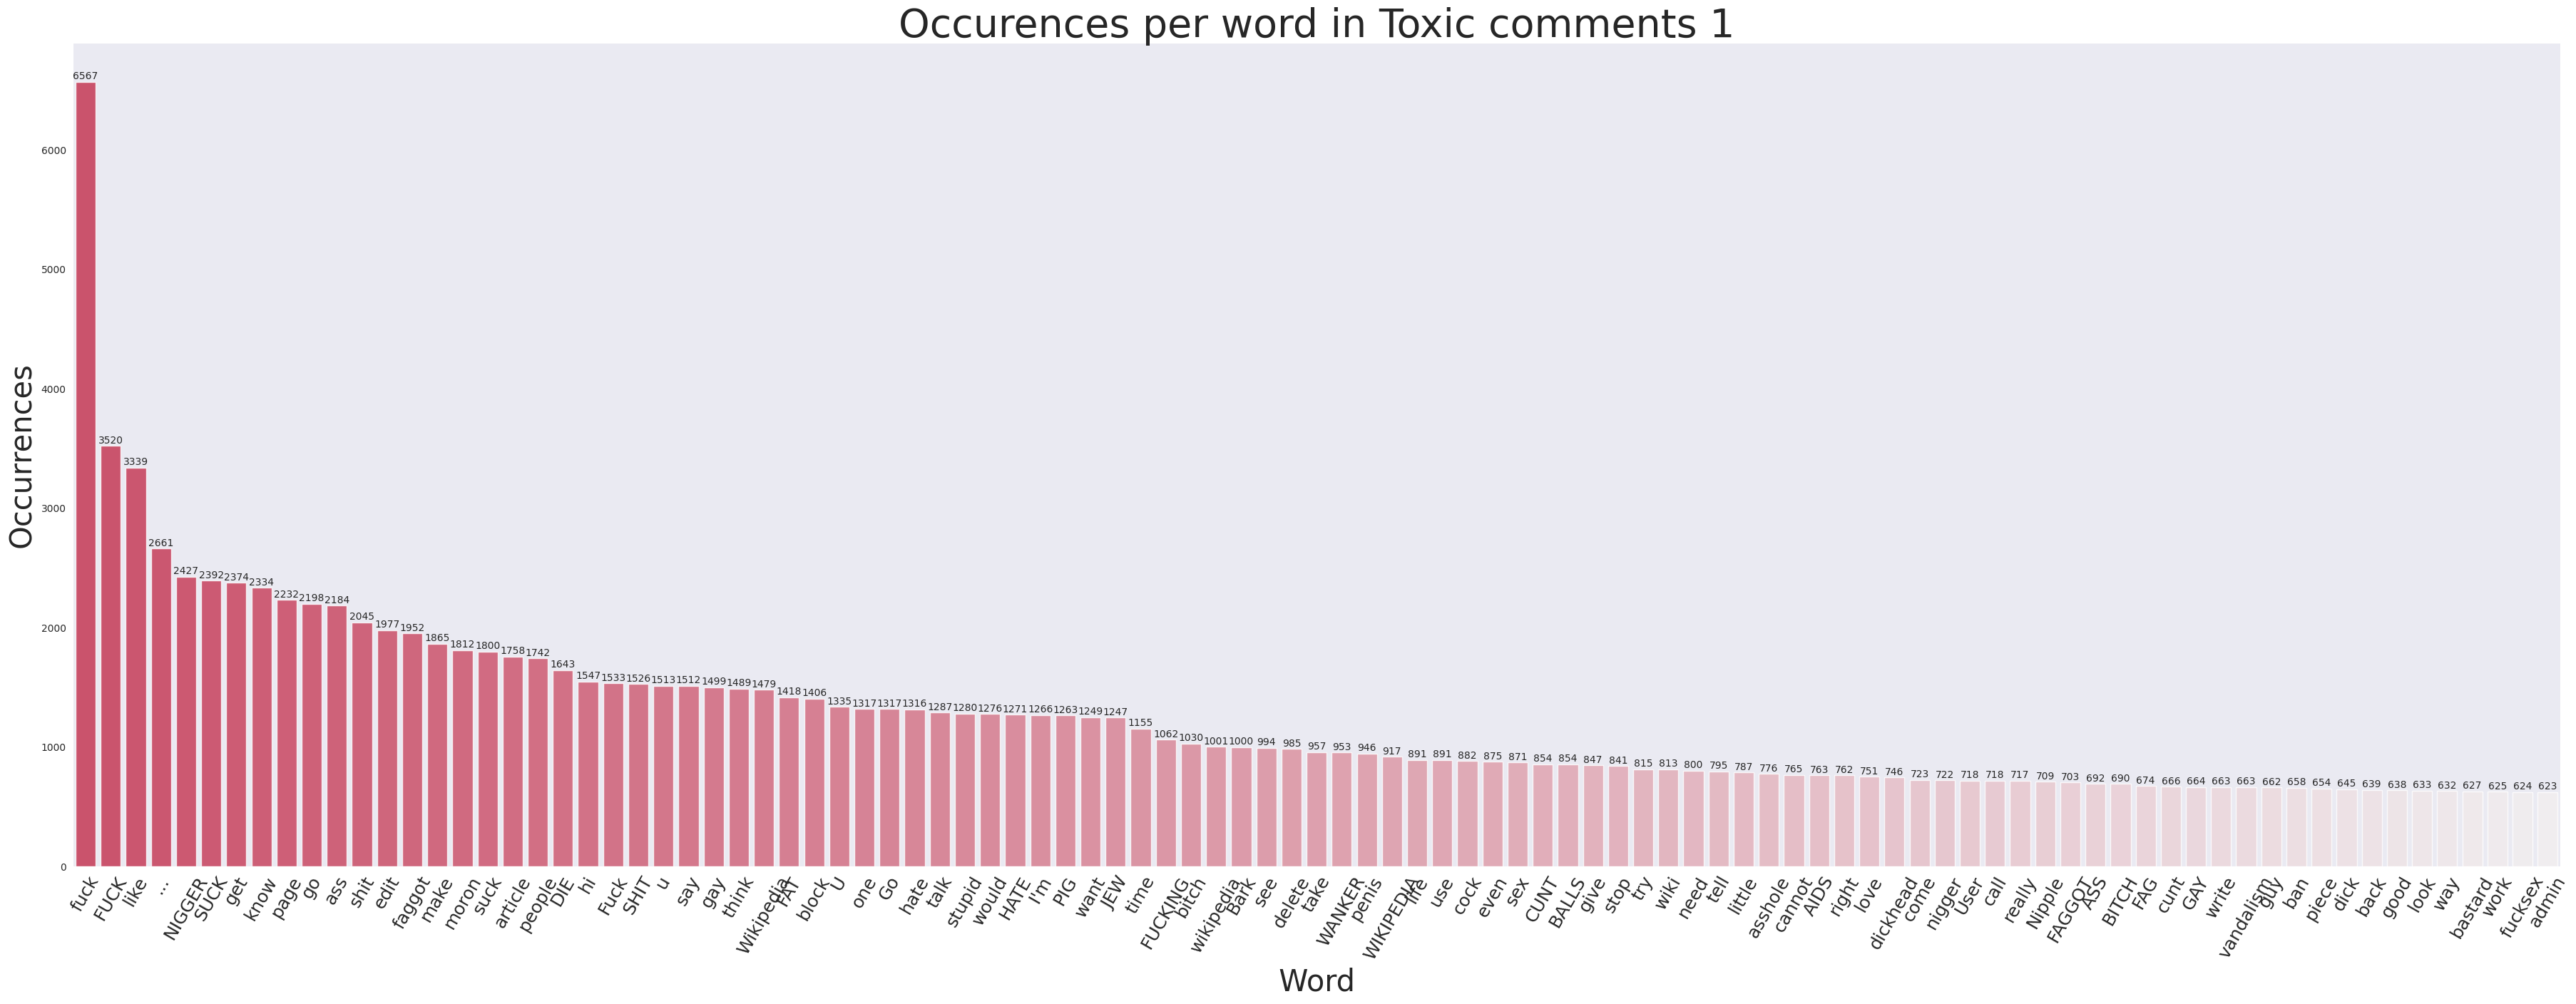

In [ ]:
fd=nltk.FreqDist(word for word in toxic1)

x=[fd.most_common(150)[i][0] for i in range(99)]
y=[fd.most_common(150)[i][1] for i in range(99)]

palette= sns.light_palette("crimson",100,reverse=True)
plt.figure(figsize=(45,15))
ax= sns.barplot(x=x, y=y, alpha=0.8,palette=palette)

plt.title("Occurences per word in Toxic comments 1", fontsize=40)
plt.ylabel('Occurrences', fontsize=30)
plt.xlabel(' Word ', fontsize=30)

# Adding the text labels
rects = ax.patches
labels = y
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation=60, fontsize=18)
plt.show()

In [ ]:
#Final Testing of the dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

train_text = train['comment_text']
test_text = test['comment_text']
all_text = pd.concat([train_text, test_text])

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    max_features=20000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(1, 4),
    max_features=20000)

char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)
test_char_features = char_vectorizer.transform(test_text)

train_features = hstack([train_char_features, train_word_features])
test_features = hstack([test_char_features, test_word_features])

scores = []
submission = pd.DataFrame.from_dict({'id': test['id']})
for class_name in class_names:
    train_target = train[class_name]
    classifier = LogisticRegression(solver='sag')

    cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    classifier.fit(train_features, train_target)
    submission[class_name] = classifier.predict_proba(test_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

submission.to_csv('submission.csv', index=False)

CV score for class toxic is 0.9786714508051594
CV score for class severe_toxic is 0.9888003707333016
CV score for class obscene is 0.9903479197223577
CV score for class threat is 0.9890148781247644
CV score for class insult is 0.9828316879192357
CV score for class identity_hate is 0.9830972415091127
Total CV score is 0.9854605914689887
